#Setup

In [1]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Navigate to folder containing project
import os
os.chdir("drive/My Drive/COMP 551 Project 4/")

#ResNet50V2 on CIFAR 10


In [3]:
# Import datasets directly from keras 
from keras.datasets import cifar10
from keras.applications.resnet_v2 import ResNet50V2
from keras import optimizers
from keras.layers import Input
from keras.callbacks import CSVLogger

Using TensorFlow backend.


In [4]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
from google.colab.patches import cv2_imshow
# Function to show a single image 
def show_single_picture(img):
    """ Plot an image """
    cv2_imshow(img*255)

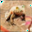

In [6]:
# Peek image
show_single_picture(x_train[0])

In [0]:
# Save data properties 
img_size = x_train[0].shape[0]
num_channels = x_train[0].shape[2]

In [0]:
# Experimental data
EPOCHS = 200
batch_sizes = [16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320]
bs_simplified = [16, 32, 96, 128, 160, 192, 224, 256, 320]
# bs = bs_simplified[0]
learning_rates =  [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]
lr_simplified = [0.01,0.02,0.03,0.05,0.075,0.10,0.125,0.15,0.175,0.2]
lr = lr_simplified[4]

In [0]:
for bs in bs_simplified:
  print("Batch Size: {}\nLearning Rate: {}".format(bs, lr))
  # Create ResNet model
  resnet = ResNet50V2(weights='imagenet', include_top=True, input_tensor=Input(shape=(img_size,img_size,num_channels)))
  
  # Customize SGD optimizer with Generalization Bound 
  sgd = optimizers.SGD(lr=lr, momentum=0.0, nesterov=False)

  # Compile the model (should be done ***after*** setting layers to non-trainable)
  resnet.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

  # Print a summary of the model
  resnet.summary()

  # Create a CSV Logger
  csv_logger = CSVLogger("Results/ResNetCIFAR10/batch_size{}_learning_rate{}.csv".format(bs, lr), separator=',', append=False)

  # Train ResNet using fix learning rate for multiple batch size 
  history = resnet.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),batch_size=bs, epochs=EPOCHS, verbose=1, use_multiprocessing=True, callbacks=[csv_logger])

Batch Size: 16
Learning Rate: 0.075












102875136/102869336 [==============================] - 3s 0us/step


Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_